In [1]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as  transforms
import matplotlib.pyplot as plt
import math
import torch.nn.functional as F
from tqdm import tqdm


In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print(device)
elif torch.backends.mps.is_available():
    device = torch.device('mps')
    print(device)
else:
    device = torch.device("cpu")
    print(device)

mps


In [3]:
DATASET_PATH = "../datasets"
BATCH_SIZE = 64

In [4]:
train_set = torchvision.datasets.MNIST(DATASET_PATH, train= True, transform= transforms.ToTensor(), download= True)
test_set = torchvision.datasets.MNIST(DATASET_PATH, train= False, transform= transforms.ToTensor(), download= True)

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
len(train_set), len(test_set)

(60000, 10000)

In [6]:
def plot_img(data, loader=False):
    idx = np.random.randint(len(data))
    if loader == False:         
        img, label = data[idx] #img has 3D: [1, 28, 28]         
        print('Number:', label)
        fig = plt.figure(figsize=(2, 2))
        plt.imshow(img[0], cmap='gray') #img[0]:[28, 28] for show
        plt.axis('off') 
        plt.show()
        img = img[0]
    else:
        classes = data.dataset.classes #list with 10 tags: '0 - zero', etc
        label = classes[data.dataset[idx][1]] # 1 is index with tag, 0 is 3D of imagen
        print('Number:', label[0]) #number in string
        img = data.dataset[idx][0] #index 0 is [1, 28, 28] -> (3D)
        fig = plt.figure(figsize=(2, 2)) 
        plt.imshow(img[0], cmap='gray') # img[0]:[28, 28] for show
        plt.axis('off')  
        plt.show()
        img = img[0]
        label = int(label[0])
    return img, label      

Number: 3


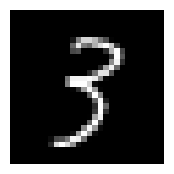

In [7]:
imagen, etiqueta = plot_img(train_set) #probar con True

Number: 1


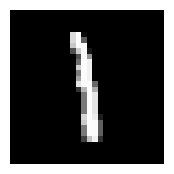

In [8]:
image, tag = plot_img(test_loader, True)


In [9]:
for i, (img, label) in enumerate(train_loader):
    print('i = ', i)
    #print(img)
    print('img.shape:', img.shape)
    print('type(img):', type(img))
    print('label:', label)
    print('label.shape:', label.shape) 
    print('type(label):', type(label)) 
    print('-'*5)
    if i == 1:
        break

i =  0
img.shape: torch.Size([64, 1, 28, 28])
type(img): <class 'torch.Tensor'>
label: tensor([2, 4, 0, 8, 1, 4, 9, 3, 0, 5, 3, 5, 4, 5, 9, 3, 7, 8, 3, 8, 0, 6, 2, 3,
        4, 2, 4, 9, 5, 5, 7, 1, 3, 9, 5, 9, 0, 6, 8, 3, 9, 7, 6, 6, 9, 3, 9, 5,
        9, 7, 3, 3, 5, 6, 0, 5, 3, 0, 6, 6, 6, 1, 0, 9])
label.shape: torch.Size([64])
type(label): <class 'torch.Tensor'>
-----
i =  1
img.shape: torch.Size([64, 1, 28, 28])
type(img): <class 'torch.Tensor'>
label: tensor([3, 7, 9, 7, 5, 3, 8, 0, 3, 5, 4, 9, 1, 1, 8, 3, 9, 3, 1, 6, 4, 9, 4, 1,
        1, 1, 4, 3, 3, 7, 2, 3, 3, 1, 4, 1, 5, 3, 8, 1, 7, 6, 5, 0, 9, 0, 9, 3,
        1, 7, 3, 2, 3, 0, 1, 9, 3, 1, 8, 9, 1, 7, 5, 6])
label.shape: torch.Size([64])
type(label): <class 'torch.Tensor'>
-----


imgs with train_set:for Conv2D need 4D -> [batch_size, Channel, H,W])


In [10]:
def Show_imgs(imgs, name,  size = 3, color = True):
  if color == False:
    color_m ='gray'
  print('****************** ' + name  +  ' **************************')
  img_numbers = imgs.shape[0]
  rows = cols = math.ceil(np.sqrt(img_numbers))  
  fig = plt.figure(figsize=(rows*size, cols*size))
  for i in range(0, rows*cols):
    fig.add_subplot(rows, cols,i+1)
    if i<img_numbers:
      plt.imshow(imgs[i].detach(), cmap = 'gray')
  plt.show()

****************** Number **************************


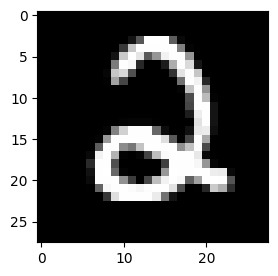

In [11]:
index = np.random.randint(len(train_set))
img, label = train_set[index]
Show_imgs(img, "Number")

In [12]:
print('before unsqueeze:', img.shape)
img = img.unsqueeze(0)
print('after unsqueeze:', img.shape)

before unsqueeze: torch.Size([1, 28, 28])
after unsqueeze: torch.Size([1, 1, 28, 28])


torch.Size([1, 4, 28, 28])
****************** nn.Conv2d **************************


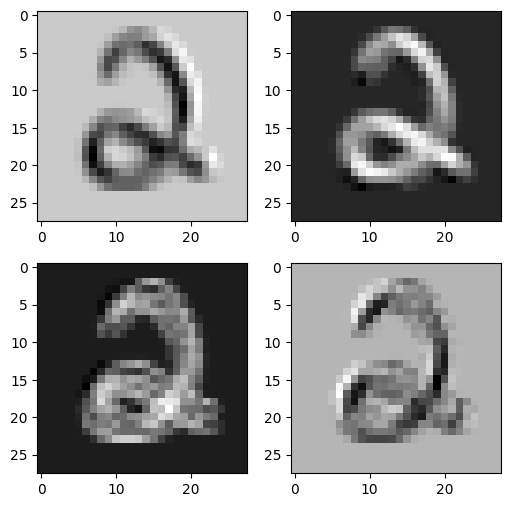

In [13]:
conv1 = nn.Conv2d(in_channels=1,out_channels=4, kernel_size=3, stride=1, padding=1)
out =  conv1(img)
print(out.shape)
Show_imgs(out[0],"nn.Conv2d")

****************** nn.ReLU() **************************


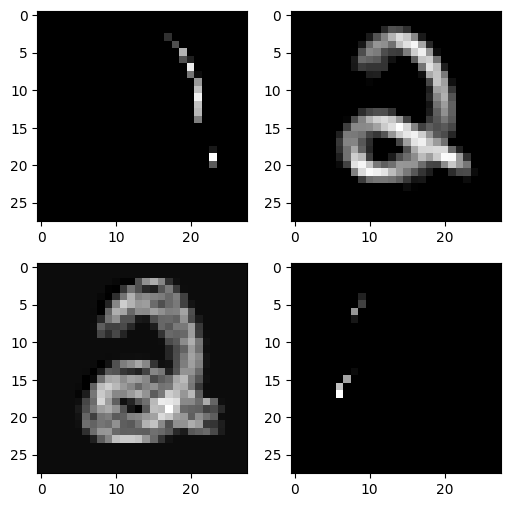

In [14]:
act = nn.ReLU()(out)
Show_imgs(act[0],"nn.ReLU()")

****************** nn.MAxPool2d **************************


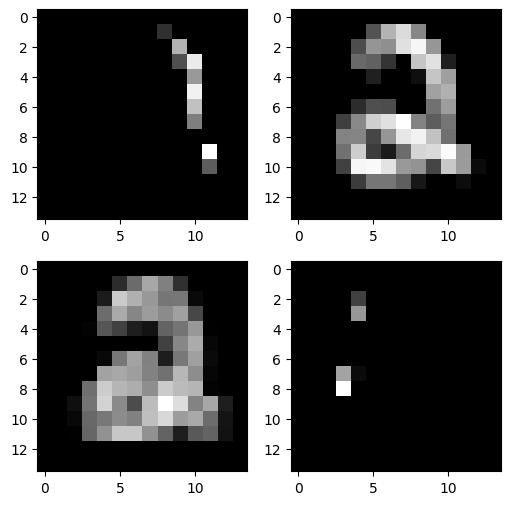

In [15]:
pool1 = nn.MaxPool2d(2,2)(act)
Show_imgs(pool1[0],"nn.MAxPool2d")

****************** layer 1 **************************


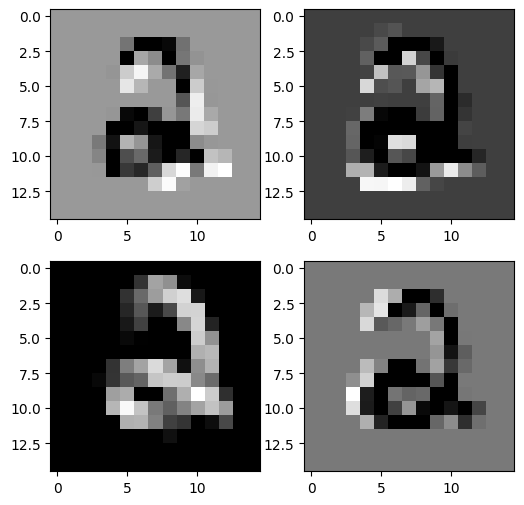

In [16]:
layer1 = nn.Sequential( nn.Conv2d(1,4,3,1,2) , nn.ReLU(), nn.MaxPool2d(2,2))
out = layer1(img)
Show_imgs(out[0], "layer 1")

In [17]:
class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=4, stride=2, padding=1)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=64*2, kernel_size=4, stride=2, padding=1)
    self.fc = nn.Linear(in_features=64*2*7*7, out_features=10)

  def forward(self, image):
    #print("image",image.shape)
    out = F.relu(self.conv1(image))
    #print("convolucion1",out.shape)
    out = F.relu(self.conv2(out))
    #print("convolucion2",out.shape)
    out = out.view(out.size(0), -1)
    #print("MLP",out.shape)
    z = self.fc(out)
    return z

In [18]:
modelEncoder = Encoder()
print(modelEncoder)



Encoder(
  (conv1): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (fc): Linear(in_features=6272, out_features=10, bias=True)
)


In [19]:
outputEncoder = modelEncoder(img)

In [20]:
outputEncoder.shape

torch.Size([1, 10])

In [21]:
outputEncoder

tensor([[ 0.0527, -0.0558, -0.0273,  0.0506,  0.0366,  0.0105, -0.0229, -0.0172,
         -0.0235, -0.0334]], grad_fn=<AddmmBackward0>)

In [22]:
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()
    self.fc    = nn.Linear(in_features=10,out_features=2*64*7*7)
    self.convTran1 = nn.ConvTranspose2d(in_channels=2*64,out_channels=64, kernel_size=4, stride=2, padding=1)
    self.convTran2 = nn.ConvTranspose2d(in_channels=64,out_channels=1, kernel_size=4, stride=2, padding=1)

  def forward(self, latent):
    out = self.fc(latent)
    #print("MLP",out.shape)
    out = out.view(out.size(0), 64*2, 7, 7)
    #print("decon1",out.shape)
    out = F.relu(self.convTran1(out))
    #print("decon1",out.shape)
    out = torch.tanh(self.convTran2(out))
    #print("decon1",out.shape)
    return out

In [23]:
modelDecoder = Decoder()
print(modelDecoder)

Decoder(
  (fc): Linear(in_features=10, out_features=6272, bias=True)
  (convTran1): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (convTran2): ConvTranspose2d(64, 1, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
)


In [24]:
outputDecoder = modelDecoder(outputEncoder)

In [25]:
outputDecoder.shape

torch.Size([1, 1, 28, 28])

In [26]:
outputDecoder

tensor([[[[ 1.6840e-01,  2.2569e-01,  2.6324e-01,  1.4227e-01,  2.5986e-01,
            1.6515e-01,  3.1076e-01,  1.0561e-01,  2.6431e-01,  2.6537e-01,
            3.1487e-01,  1.8466e-01,  3.2159e-01,  2.0535e-01,  2.8637e-01,
            1.5538e-01,  3.6532e-01,  2.0314e-01,  2.8784e-01,  1.1686e-01,
            2.7108e-01,  1.6586e-01,  1.9919e-01,  2.3642e-01,  2.5284e-01,
            1.4553e-01,  2.1588e-01,  1.8230e-01],
          [ 3.9365e-02,  1.6738e-01,  1.0723e-01,  1.6102e-01, -7.6270e-02,
            1.7612e-01,  4.6088e-02,  2.2232e-01,  1.1156e-01,  2.6141e-01,
            7.0773e-02,  1.1416e-01,  2.4321e-01,  2.7041e-01,  4.7415e-03,
            2.1197e-01,  1.6853e-01,  1.8396e-01, -2.2335e-02,  2.5835e-01,
            1.8578e-01,  1.7970e-01,  1.5374e-01,  1.4326e-01,  1.7144e-01,
            1.8661e-01,  1.3601e-03,  1.3262e-01],
          [ 2.3352e-01, -4.8101e-03,  2.9418e-01,  2.0722e-01,  2.0904e-01,
            1.3573e-01,  2.2147e-01,  1.1987e-01,  2.3822e-01,

In [27]:
outputDecoder[0].shape

torch.Size([1, 28, 28])

****************** img of outDecoder **************************


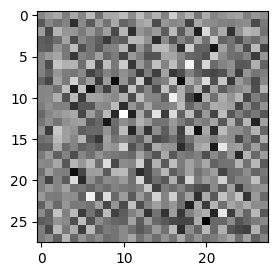

In [28]:
Show_imgs(outputDecoder[0], "img of outDecoder")

In [29]:
class Autoencoder(nn.Module):
   def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()

   def forward(self, x):
        latent = self.encoder(x)
        x_recon = self.decoder(latent)
        return  x_recon

¿Cómo puedes entrenarlo? ¿Cómo sabemos qué tipo de "codificador" y "decodificador" deseas?
Si pasamos una imagen a través del codificador y luego pasamos el resultado a través del decodificador, deberíamos obtener aproximadamente la misma imagen. Lo ideal es reducir la dimensionalidad y luego generar la imagen debería darnos el mismo resultado.

Esta observación nos proporciona una estrategia de entrenamiento: minimizaremos el error de reconstrucción del codificador automático en nuestros datos de entrenamiento. 
Se guardan las imágenes reconstruidas de la última iteración en cada época para observar estas reconstrucciones al final del entrenamiento.

In [30]:
def train(model, train_loader, Epochs, loss_fn):
    train_loss_avg = []
    outputs = []
    for epoch in tqdm(range(Epochs)):
      train_loss_avg.append(0)
      num_batches = 0

      for image_batch, label in train_loader:
          #image_batch_r = image_batch_r.to(device)
          image_batch = image_batch.to(device)
          #print(image_batch.size())

          image_batch_recon = model(image_batch)
          #print(image_batch_recon.size())
          loss = loss_fn(image_batch_recon, image_batch)
          #print("el loss es",loss)

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          train_loss_avg[-1] += loss.item()
          num_batches += 1

      train_loss_avg[-1] /= num_batches
      print('Epoch [%d / %d] average reconstruction error: %f' % (epoch+1, Epochs, train_loss_avg[-1]))
      outputs.append((epoch, image_batch, image_batch_recon),)
    return train_loss_avg, outputs

In [31]:
capacity = 64
latent_dims = 10
learning_rate = 0.001
autoencoder = Autoencoder()
autoencoder.to(device)
loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate, weight_decay=1e-5)

autoencoder.train()
loss_result, outputs_result = train(autoencoder,train_loader,20,loss)


  0%|                                                    | 0/20 [00:00<?, ?it/s]

  5%|██▏                                         | 1/20 [00:11<03:39, 11.56s/it]

Epoch [1 / 20] average reconstruction error: 0.026985


 10%|████▍                                       | 2/20 [00:22<03:21, 11.21s/it]

Epoch [2 / 20] average reconstruction error: 0.019579


 15%|██████▌                                     | 3/20 [00:34<03:13, 11.38s/it]

Epoch [3 / 20] average reconstruction error: 0.018313


 20%|████████▊                                   | 4/20 [00:45<03:01, 11.34s/it]

Epoch [4 / 20] average reconstruction error: 0.017696


 25%|███████████                                 | 5/20 [00:56<02:48, 11.25s/it]

Epoch [5 / 20] average reconstruction error: 0.017324


 30%|█████████████▏                              | 6/20 [01:07<02:38, 11.34s/it]

Epoch [6 / 20] average reconstruction error: 0.017039


 35%|███████████████▍                            | 7/20 [01:19<02:26, 11.28s/it]

Epoch [7 / 20] average reconstruction error: 0.016848


 40%|█████████████████▌                          | 8/20 [01:30<02:14, 11.21s/it]

Epoch [8 / 20] average reconstruction error: 0.016702


 45%|███████████████████▊                        | 9/20 [01:41<02:04, 11.33s/it]

Epoch [9 / 20] average reconstruction error: 0.016579


 50%|█████████████████████▌                     | 10/20 [01:52<01:52, 11.24s/it]

Epoch [10 / 20] average reconstruction error: 0.016482


 55%|███████████████████████▋                   | 11/20 [02:03<01:40, 11.19s/it]

Epoch [11 / 20] average reconstruction error: 0.016377


 60%|█████████████████████████▊                 | 12/20 [02:15<01:30, 11.32s/it]

Epoch [12 / 20] average reconstruction error: 0.016295


 65%|███████████████████████████▉               | 13/20 [02:26<01:18, 11.23s/it]

Epoch [13 / 20] average reconstruction error: 0.016203


 70%|██████████████████████████████             | 14/20 [02:37<01:07, 11.19s/it]

Epoch [14 / 20] average reconstruction error: 0.016148


 75%|████████████████████████████████▎          | 15/20 [02:49<00:56, 11.31s/it]

Epoch [15 / 20] average reconstruction error: 0.016076


 80%|██████████████████████████████████▍        | 16/20 [03:00<00:44, 11.23s/it]

Epoch [16 / 20] average reconstruction error: 0.015998


 85%|████████████████████████████████████▌      | 17/20 [03:11<00:33, 11.22s/it]

Epoch [17 / 20] average reconstruction error: 0.015934


 90%|██████████████████████████████████████▋    | 18/20 [03:23<00:22, 11.33s/it]

Epoch [18 / 20] average reconstruction error: 0.015886


 95%|████████████████████████████████████████▊  | 19/20 [03:34<00:11, 11.26s/it]

Epoch [19 / 20] average reconstruction error: 0.015807


100%|███████████████████████████████████████████| 20/20 [03:45<00:00, 11.26s/it]

Epoch [20 / 20] average reconstruction error: 0.015771


In [32]:
loss_result

[0.026984885523615998,
 0.01957915695324572,
 0.018313172009231438,
 0.0176956991700809,
 0.017323618675314033,
 0.017038683288855785,
 0.016847893524208048,
 0.016701819397993624,
 0.016578758094729834,
 0.01648234893410985,
 0.016376794070632916,
 0.016294502114047055,
 0.0162026083646918,
 0.016147905420551677,
 0.016075733125702277,
 0.015997843787089974,
 0.015934232514160974,
 0.015885615546597856,
 0.01580684998237502,
 0.015770707847371793]

In [33]:
len(outputs_result), type(outputs_result)

(20, list)

In [34]:
len(outputs_result[0]), type(outputs_result[0][0]), type(outputs_result[0][1]), type(outputs_result[0][2])

(3, int, torch.Tensor, torch.Tensor)

In [35]:
#outputs_result[19][0] #[0-19][x] epochs
#len(outputs_result) #20 epochs
#len(outputs_result[1]) #tuple with 3 elements


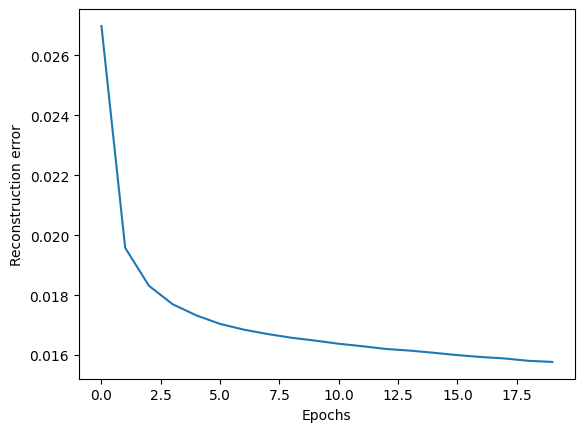

In [36]:
fig = plt.figure()
plt.plot(loss_result)
plt.xlabel('Epochs')
plt.ylabel('Reconstruction error')
plt.show()

La pérdida disminuye a medida que entrenamos, lo que significa que nuestras imágenes reconstruidas se parecen cada vez más a las imágenes reales.
Ahora reconstruyendo las imágenes en varios puntos del entrenamiento:

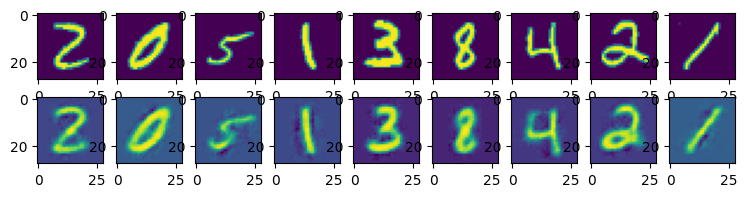

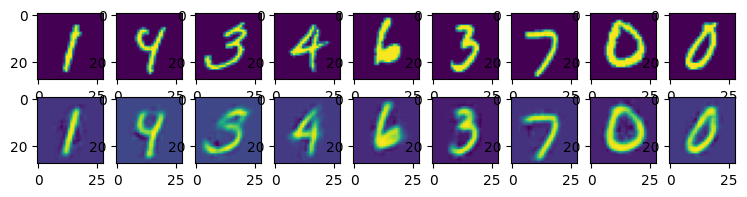

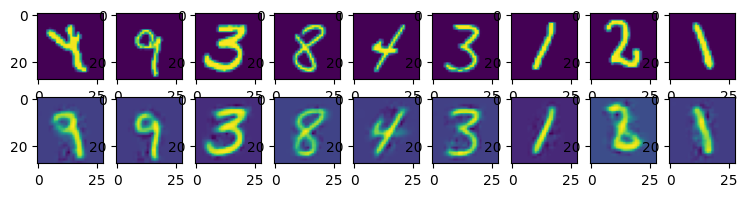

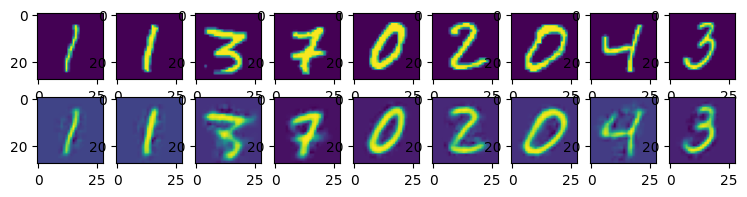

In [37]:
max_epochs = 20
for k in range(0, max_epochs, 5):
    plt.figure(figsize=(9, 2))
    imgs = outputs_result[k][1].to("cpu").detach()
    recon = outputs_result[k][2].to("cpu").detach()
    #print(type(imgs))
    #print(len(imgs))
    #print(imgs)
    #print(type(recon))
    #print(len(recon))
    #print(recon[0][0].shape)
    #plt.imshow(recon[0][0])
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        plt.imshow(item[0])
        
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        plt.imshow(item[0])

A medida que avanza el entrenamiento, nuestras reconstrucciones son más claras.